In [1]:
import torch 
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

### WGAN_GP的实现过程可视化
该算法的一个trick就是将生成的图片和真实的图片进行差值，我们对这个过程做一个可视化
假设只有一张fake图片，以及一张real的图片

In [2]:
real = torch.randn(1,3,4,4)
fake = torch.randn(1,3,4,4)

In [3]:
# repeat相当于实现广播机制 但其实没必要
epsilon = torch.rand((1,1,1,1)).repeat(1,3,4,4) 
print(epsilon)

tensor([[[[0.0569, 0.0569, 0.0569, 0.0569],
          [0.0569, 0.0569, 0.0569, 0.0569],
          [0.0569, 0.0569, 0.0569, 0.0569],
          [0.0569, 0.0569, 0.0569, 0.0569]],

         [[0.0569, 0.0569, 0.0569, 0.0569],
          [0.0569, 0.0569, 0.0569, 0.0569],
          [0.0569, 0.0569, 0.0569, 0.0569],
          [0.0569, 0.0569, 0.0569, 0.0569]],

         [[0.0569, 0.0569, 0.0569, 0.0569],
          [0.0569, 0.0569, 0.0569, 0.0569],
          [0.0569, 0.0569, 0.0569, 0.0569],
          [0.0569, 0.0569, 0.0569, 0.0569]]]])


In [4]:
x = torch.ones_like(fake)
x = x*torch.rand((1,1,1,1))
print(x)

tensor([[[[0.5748, 0.5748, 0.5748, 0.5748],
          [0.5748, 0.5748, 0.5748, 0.5748],
          [0.5748, 0.5748, 0.5748, 0.5748],
          [0.5748, 0.5748, 0.5748, 0.5748]],

         [[0.5748, 0.5748, 0.5748, 0.5748],
          [0.5748, 0.5748, 0.5748, 0.5748],
          [0.5748, 0.5748, 0.5748, 0.5748],
          [0.5748, 0.5748, 0.5748, 0.5748]],

         [[0.5748, 0.5748, 0.5748, 0.5748],
          [0.5748, 0.5748, 0.5748, 0.5748],
          [0.5748, 0.5748, 0.5748, 0.5748],
          [0.5748, 0.5748, 0.5748, 0.5748]]]])


### 首先导入两张图片

In [5]:
# 先将两站图片导入
img1 = np.array(Image.open('image/01.jpg'))
img2 = np.array(Image.open('image/02.jpg'))
print("第一张图片",img1.shape, "第二张图片", img2.shape)

第一张图片 (218, 178, 3) 第二张图片 (218, 178, 3)


In [6]:
# 接下里把两张照片转弯张量
tran = transforms.Compose(
    [
        transforms.ToPILImage(),
        transforms.Resize((128,128)),
        transforms.ToTensor()
    ]
)

tens_1 = tran(img1)
tens_2 = tran(img2)

print(tens_1.shape)

torch.Size([3, 128, 128])


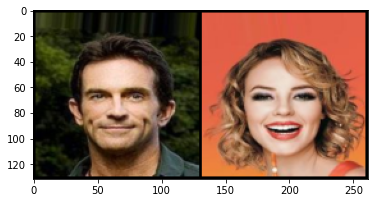

In [7]:
# 将张量转换为图片格式输出
def imshow(img):
    npimg = img.numpy()  #转换为numpy格式（在CPU上）
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

images = [tens_1,tens_2]
imshow(torchvision.utils.make_grid(images))

### 对两张图片进行插值

tensor([0.5337])


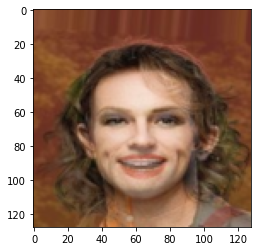

In [11]:
a = torch.rand(1)
print(a)
inter_img = a*tens_1 + (1-a)*tens_2

imshow(inter_img)

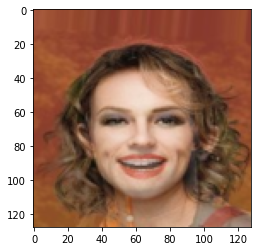

In [9]:
# 用另一种方式对其进行差值
b = torch.rand((1,1,1)).repeat(3,128,128)
# print(b)

inter_img_2 = b*tens_1 + (1-b)*tens_2
imshow(inter_img_2)